<a href="https://colab.research.google.com/github/wootaehyeon/pytorch-Tutorial/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
      super().__init__()
      self.fc1 = nn.Linear(in_features, h1)
      self.fc2 = nn.Linear(h1, h2)
      self.out = nn.Linear(h2, out_features)

    def forward(self,x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)
      return x


In [6]:
torch.manual_seed(41)
model = Model()

In [23]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [24]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
#change last

<ipython-input-24-681870b1c7be>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [25]:
X = my_df.drop('species', axis=1).to_numpy().astype(np.float32)
y = my_df['species'].to_numpy().astype(np.int64)

In [26]:
X = X.values
y = y.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [27]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [14]:
#set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer, lr = learning rate(iff error doesn't go down after)
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [16]:
#train our model
#Epoch?v(one run thru all the training data in our network)
epochs = 100 #100번 반복
losses = []
for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(X_train) #Get predicted results

  #Measure the loss/error, gonna
  lose = criterion(y_pred,y_train) #predicted values vs the y_train

  #keep Track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i%10 == 0:
    print(f'Epoch : {i} and loss: {loss}')

  #Do some back propagation: take error rate of forward propagation and feed it back
  #thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

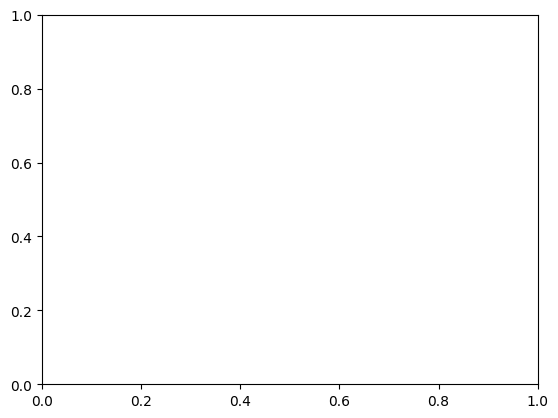

In [28]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')